# Fine-tune classifier

In [1]:
import json
import math
import keras_cv
import tensorflow as tf
import tensorflow_datasets as tfds
import keras_core as keras
from keras import losses, metrics
import numpy as np
import matplotlib.pyplot as plt



Using TensorFlow backend


/Users/frazerhogg/Development /Udemy/ML Computer Vision /Image Classification, Fine-Tuning, and Transerfer Learning/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
!curl -LOC - https://archive.org/download/lions_cheetahs/lions_cheetahs.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 71.3M  100 71.3M    0     0  6877k      0  0:00:10  0:00:10 --:--:-- 9924k


In [5]:
!unzip -n lions_cheetahs.zip

Archive:  lions_cheetahs.zip
  inflating: images/Cheetahs/0052cb267268c59e.jpg  
  inflating: images/Cheetahs/00707659aba29334.jpg  
  inflating: images/Cheetahs/007f9ffc01c7b106.jpg  
  inflating: images/Cheetahs/00bb45a8568a3474.jpg  
  inflating: images/Cheetahs/00c8d36882dd6d37.jpg  
  inflating: images/Cheetahs/00d100b0231b60e6.jpg  
  inflating: images/Cheetahs/00d9eb862ba3dfc6.jpg  
  inflating: images/Cheetahs/012f5ecbf49e1da0.jpg  
  inflating: images/Cheetahs/01750ba1a197e3ad.jpg  
  inflating: images/Cheetahs/01d688c043bdbfbb.jpg  
  inflating: images/Cheetahs/0230496e4a8ed917.jpg  
  inflating: images/Cheetahs/02871f24d5abe59c.jpg  
  inflating: images/Cheetahs/029b39c0b65ebeb3.jpg  
  inflating: images/Cheetahs/02a0439923768403.jpg  
  inflating: images/Cheetahs/02a5846a35629f1d.jpg  
  inflating: images/Cheetahs/02b086c4e96396f6.jpg  
  inflating: images/Cheetahs/02dd8dd4344b04a7.jpg  
  inflating: images/Cheetahs/0321448f2848ab99.jpg  
  inflating: images/Cheetahs/038182

In [7]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    'images',
    image_size=(224, 224),
    validation_split=0.3,
    subset='both',
    seed=123
)

Found 200 files belonging to 2 classes.
Using 140 files for training.
Using 60 files for validation.


In [8]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
train_ds = train_ds.shuffle(
    10 * 32, 
    reshuffle_each_iteration=True
)

(12, 224, 224, 3)


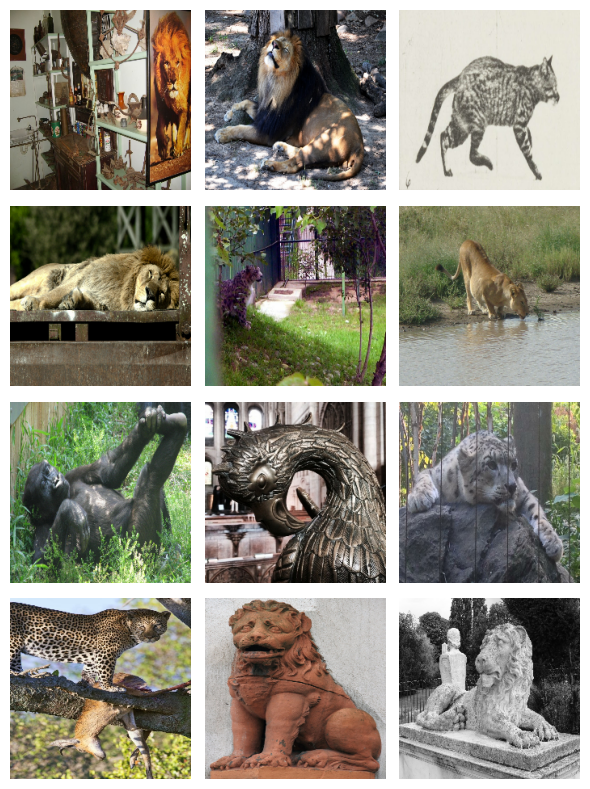

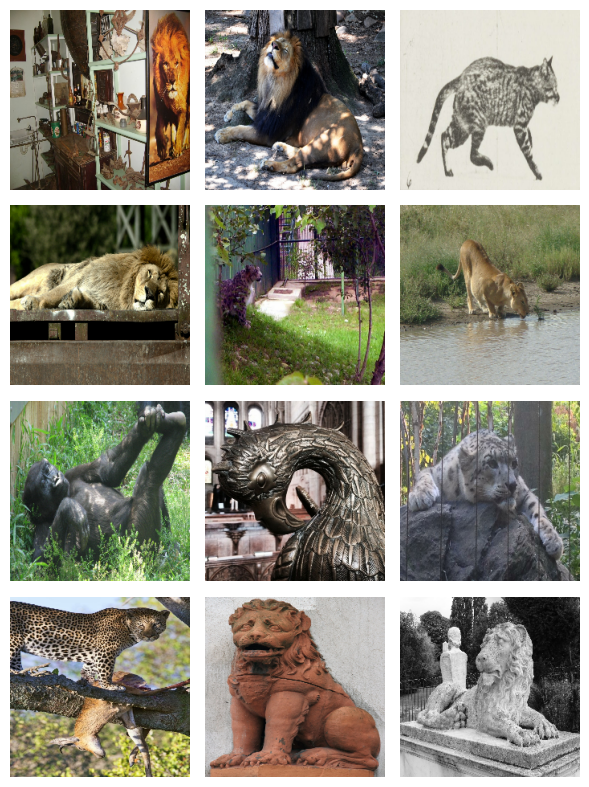

In [13]:
images = next(iter(train_ds.take(1)))[0]
print(images.shape)
keras_cv.visualization.plot_image_gallery(images, value_range=(0, 255))

In [ ]:
model = keras_cv.models.ImageClassifier.from_preset(
    'efficientnetv2_b0_imagenet',
    num_classes=2
)

model.compile(
     loss='sparse_categorical_crossentropy',
    # optimizer=tf.keras.optimizers.SDG(learning_rate=0.01),
    optimizer=tf.keras.optimizers.AdamW(),
    metrics=['accuracy']
)

In [16]:
r = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 772ms/step - accuracy: 0.6786 - loss: 0.5706 - val_accuracy: 0.7500 - val_loss: 0.3884
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 725ms/step - accuracy: 0.9571 - loss: 0.1925 - val_accuracy: 0.9667 - val_loss: 0.1593
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 636ms/step - accuracy: 1.0000 - loss: 0.0565 - val_accuracy: 0.9500 - val_loss: 0.1605
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 725ms/step - accuracy: 0.9929 - loss: 0.0327 - val_accuracy: 0.9167 - val_loss: 0.1726
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 647ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 0.8667 - val_loss: 0.2075
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 733ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 0.8500 - val_loss: 0.2560
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 694ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.8667 - val_loss: 0.2743
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 682ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 0.9333 - val_loss

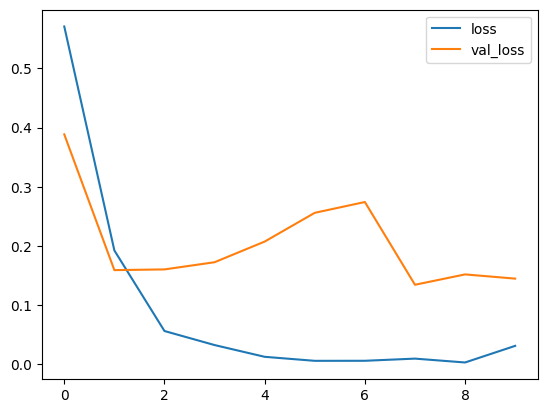

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

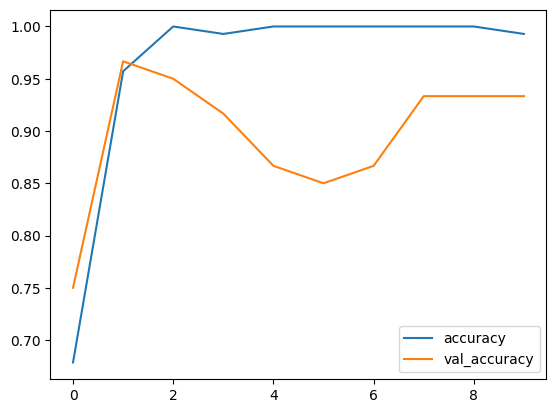

In [18]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [19]:
# How to make a prediction on a single image 
from PIL import Image

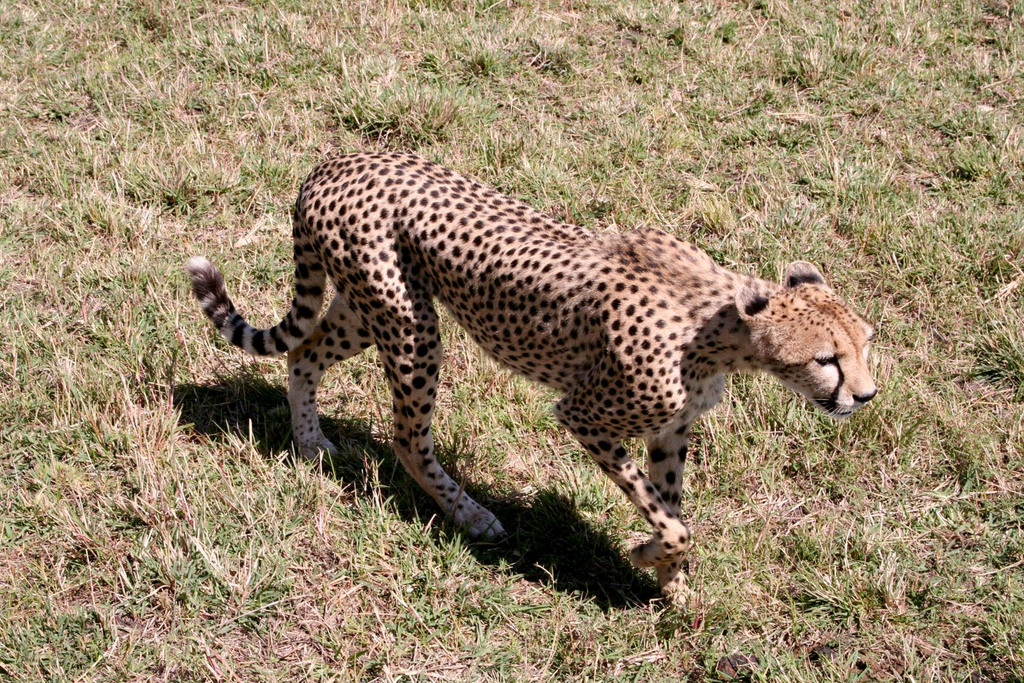

In [21]:
path = 'images/Cheetahs/0c61b8d86a3e0889.jpg'
im = Image.open(path)
im

In [22]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [27]:
np_im = np.asarray(im)

In [28]:
np_im.shape

(683, 1024, 3)

In [29]:
resizing = keras_cv.layers.Resizing(
    224, 224,
    crop_to_aspect_ratio=True
)


In [30]:
np_im_rs = resizing(np_im)
np_im_rs

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[162.58754 , 139.46599 , 105.73607 ],
        [214.00516 , 196.03333 , 175.93149 ],
        [158.1468  , 150.78218 , 111.465996],
        ...,
        [204.6153  , 168.6153  , 142.86084 ],
        [205.9747  , 174.99382 , 146.12926 ],
        [214.21606 , 186.36226 , 165.14352 ]],

       [[206.49887 , 169.57254 , 151.71986 ],
        [207.15466 , 187.45473 , 161.93369 ],
        [149.71169 , 143.80086 ,  95.997284],
        ...,
        [208.9387  , 181.17778 , 158.57945 ],
        [194.95575 , 166.74017 , 145.49748 ],
        [238.25362 , 219.25362 , 186.39926 ]],

       [[211.83864 , 180.34544 , 160.21297 ],
        [242.51575 , 224.11516 , 202.40202 ],
        [184.60287 , 170.69609 , 126.51303 ],
        ...,
        [200.93419 , 179.56596 , 150.96439 ],
        [201.47125 , 171.74652 , 135.79231 ],
        [183.82047 , 161.8599  , 132.41133 ]],

       ...,

       [[ 95.53053 ,  59.163033,  50.258232],
        [172.

In [31]:
np_im_rs.shape

TensorShape([224, 224, 3])

In [32]:
x = tf.reshape(np_im_rs, (1, 224, 224, 3))

In [33]:
out = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


In [35]:
out # Will output an array of 2 values, one for each class.The higher value is the predicted class

array([[9.9996877e-01, 3.1205956e-05]], dtype=float32)

In [36]:
val_ds.class_names

['Cheetahs', 'Lions']